In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import math
from scipy.sparse import csr_matrix, diags
from scipy.sparse.linalg import spsolve, spsolve_triangular

# Timer
from timeit import default_timer as timer
# Visualisation libraries

## matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# The Wave Equation in Time Domain

The wave equation in time domain can be stated as follows,
\begin{equation}
\frac{\partial^2 u}{\partial t^2}=c^2 \nabla^2 u+f,\qquad x\in \Omega \subset \mathbb{R}^d,~t\in(T_1,T_2]
\end{equation}
where $\Delta$ is *the Laplacian*, $f$ is a *forcing function* (for example our source) and $c$ is *the wave velocity* at which the time and spatially varying wave $u$ propagates.

## A Fourth-Order Finite-Difference Method for the Two Dimensional Wave Equation in Time Domain

A two-dimensional form of the wave equation presented can be found as follows,

\begin{align}
\begin{cases}
\frac{\partial^2 u}{\partial t^2} = c^2(x,y) \Delta u+f(x,y,t),&(x,y)\in I,~t\in(T_1,T_2],\\
u(x,y,T_1)=g(x,y),&(x,y)\in J,\\
\frac{\partial }{\partial t}u(x,y,T_1) = s(x,y),&(x,y)\in J,\\
u(a,y,t) = f_{a}(y,t),&y\in [c,d],~t \in[T_1,T_2],\\
u(b,y,t) = f_{b}(y,t),&y\in [c,d],~t \in[T_1,T_2],\\
u(x,c,t) = f_{c}(x,t),&x\in [a,b],~t \in[T_1,T_2],\\
u(x,d,t) = f_{d}(x,t),&x\in [a,b],~t \in[T_1,T_2],
\end{cases}
\qquad \qquad (1)
\end{align}
where $I=(a,b)\times(c,d)$ and $J=[a,b]\times[c,d]$.

Consider the following notations:
* $h_x=\Delta x=\frac{b-a}{N_x},~h_y=\Delta y=\frac{d-c}{N_y}$ and $\tau=\Delta t=\frac{T_2-T_1}{N_t}$ where $N_x$, $N_y$ and $N_t$ are positive integers,
* $u_{i,j}^{n}= u(ih_x,jh_y,n\tau)$ and $c_{i,j}=c(ih_x,jh_y)$,
* $\lambda_x=\dfrac{\tau}{h_x}$ and $\lambda_y=\dfrac{\tau}{h_y}$.

## A fourth-Order Scheme

A fourth-order finite difference scheme for solving the problem (1) can be considered as follows,
\begin{align*}
\left(1+\frac{1}{12}\delta_t^2\right)^{-1}\frac{\delta_t^2}{\tau^2} u_{i,j}^{n}&=  c^2\left(1+\frac{1}{12}\delta_x^2\right)^{-1}\frac{\delta_x^2}{h_x^2} u_{i,j}^{n}+
c^2\left(1+\frac{1}{12}\delta_y^2\right)^{-1}\frac{\delta_y^2}{h_y^2} u_{i,j}^{n}+f_{i,j}^{n}.
\end{align*}

This also can be expressed as follows,
\begin{align*}
\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)\delta_t^2 u_{i,j}^{n}&=
\left[c^2 \lambda_x^2 \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2
+c^2 \lambda_y^2\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2
\right] \left(1+\frac{1}{12}\delta_t^2\right) u_{i,j}^{n}
\notag \\ &
+\tau^2\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)\left(1+\frac{1}{12}\delta_t^2\right)f_{i,j}^{n}.
\end{align*}

\begin{align*}
&\left[\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)
-\frac{c^2 \lambda_x^2}{12} \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2
-\frac{c^2 \lambda_y^2}{12}\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2\right]\delta_t^2u_{i,j}^{n}=
\notag \\ &
\left[c^2 \lambda_x^2 \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2
+c^2 \lambda_y^2\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2\right]u_{i,j}^{n}
+\tau^2\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)\left(1+\frac{1}{12}\delta_t^2\right)f_{i,j}^{n}.
\qquad \qquad (5)
\end{align*}

Consider the following notations,
\begin{align*}
\rho_x=\frac{1-c^2 \lambda_x^2}{12}\text{ and }\rho_y=\frac{1-c^2 \lambda_y^2}{12}.
\end{align*}
\begin{align*}
\left|\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)u_{i,j}^{n}
-\frac{c^2 \lambda_x^2}{12} \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2-\frac{c^2 \lambda_y^2}{12}\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2u_{i,j}^{n}
-\left(1+\rho_x\delta_x^2\right)\left(1+\rho_y\delta_y^2\right)\right|=
\frac{1}{144}c^2 \lambda_x^2 c^2 \lambda_y^2 \delta_x^2 \delta_y^2u_{i,j}^{n},
\end{align*}
which can be neglected due to the fact that it generates a fourth order term in space.

One way to write down an ADI algorithm is to  expand the equation (5) on time,
\begin{align*}
\left(1+\rho_x\delta_x^2\right)\left(1+\rho_y\delta_y^2\right)
\delta_t^2 u_{i,j}^{n}
&=
c^2\left[ \lambda_x^2 \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2
+\lambda_y^2\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2\right]u_{i,j}^{n}
\notag \\ &
+\tau^2\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)\left(1+\frac{1}{12}\delta_t^2\right)f_{i,j}^{n}.
\qquad \qquad (6)
\end{align*}
It follows from (6) that,
\begin{align*}
\left(1+\rho_x\delta_x^2\right)\left(1+\rho_y\delta_y^2\right) \delta_t^2 u_{i,j}^{n}=\mathbf{F}_{i,j}^{n}
\end{align*}
where,
\begin{align*}
\mathbf{F}_{i,j}^{n} &=
c^2\left[ \lambda_x^2 \left(1+\frac{1}{12}\delta_y^2\right)\delta_x^2
+\lambda_y^2\left(1+\frac{1}{12}\delta_x^2\right)\delta_y^2\right]u_{i,j}^{n}
+\tau^2\left(1+\frac{1}{12}\delta_x^2\right)\left(1+\frac{1}{12}\delta_y^2\right)\left(1+\frac{1}{12}\delta_t^2\right)f_{i,j}^{n}.
\end{align*}

The two-dimensional problem can be efficiently solved in two steps using ADI with the following steps,
* Approximate $\mathbf{X}_{i,j}$ from the following equation for $1\leq i\leq N_x$ and $1\leq j\leq N_y$,
\begin{align*}
\left(1+\rho_x\delta_x^2\right)\mathbf{X}_{i,j}=\mathbf{F}_{i,j}^{n}.
\qquad \qquad (7)
\end{align*}
  \item Approximate all $u_{i,j}^{n+1}$ for the current time step from the following system,
  \begin{align*}
\left(1+\rho_y\delta_y^2\right)\delta_t^2 u_{i,j}^{n}=\mathbf{X}_{i,j}^{n}.
\qquad \qquad (8)
\end{align*}
\end{enumerate}

The equation (7) also can be written as follows,
\begin{align*}
\rho_x(\mathbf{X}_{i+1,j}+\mathbf{X}_{i-1,j})+(1-2\rho_x)\mathbf{X}_{i,j}=\mathbf{F}_{i,j}^{n},
\end{align*}

The following matrices are needed to generate an algorithm,
$$
A_{j}=\begin{bmatrix}
(1-2\rho_x)    &   \rho_x         & 0                      & \dots                   &  \dots         &0
\\
\rho_x  &   (1-2\rho_x)   & \rho_x           & 0                   &  \vdots         &\vdots
\\
0               &        \rho_x  &   (1-2\rho_x)   & \rho_x              &0         &\vdots
\\
0                       &0            & \ddots                 & \ddots              &\ddots         &\vdots
\\
\vdots                        &\vdots           & \rho_x  &   (1-2\rho_x)   & \rho_x & 0
\\
\vdots                  &\vdots                      & 0                 & \rho_x  &   (1-2\rho_x)   & \rho_x
\\
0                       &0                      & \dots                 & 0               & \rho_x  &   (1-2\rho_x)
\end{bmatrix},
$$
$$
\mathbf{X}_{j}=\begin{bmatrix}
\mathbf{X}_{1,j} \\
\mathbf{X}_{2,j}\\
\vdots\\
\mathbf{X}_{N_x-2,j}\\
\mathbf{X}_{N_x-1,j}
\end{bmatrix},~
\mathbf{b}_j^n=
\begin{bmatrix}
-\rho_x \mathbf{X}_{0,j}\\
0\\
\vdots\\
0\\
-\rho_x \mathbf{X}_{N_x,j},
\end{bmatrix}
\text{ and }
\mathbf{F}_{j}^{n}=
\begin{bmatrix}
\mathbf{F}_{1,j}^{n}\\
\mathbf{F}_{2,j}^{n}\\
\vdots\\
\mathbf{F}_{N_x-2,j}^{n}\\
\mathbf{F}_{N_x-1,j}^{n}
\end{bmatrix},
$$
where
$\mathbf{X}_{0,j} =\left(1+\rho_y\delta_y^2\right)\delta_t^2 f_{a,j}^{n}$ and
$\mathbf{X}_{N_x,j} =\left(1+\rho_y\delta_y^2\right)\delta_t^2 f_{b,j}^{n}$.

Therefore, the following matrix form can be written,
\begin{equation*}
\mathbf{X}_{j}=A_j^{-1}\left(\mathbf{F}_{j}^{n}+\mathbf{b}_j^n\right).
\end{equation*}

The next step is to solve (8) for $u_{i,j}^{n}$ for each $i=1,2,\ldots,N_x-1$ and $j=1,2,\ldots,N_y-1$. This also can be written in the following form,
\begin{align*}
\rho_y\delta_t^2(u_{i,j+1}^{n+1}+u_{i,j-1}^{n+1})+(1-2\rho_y)\delta_t^2u_{i,j}^{n+1}&=\mathbf{X}_{i,j},
\end{align*}

Hence, the following matrix form can be written
\begin{equation*}
\mathbf{u}_{i}^{n+1}=A_{i}^{-1}\left(\mathbf{W}_{i}+\mathbf{b}_{i}^n\right),
\end{equation*}
where
\begin{equation*}
A_{i}=\begin{bmatrix}
(1-2\rho_y)    &   \rho_y         & 0                      & \dots                   &  \dots         &0
\\
\rho_y  &   (1-2\rho_y)   & \rho_y           & 0                   &  \vdots         &\vdots
\\
0                       & \rho_y  &   (1-2\rho_y)   & \rho_y              &0         &\vdots
\\
0                       &0            & \ddots                 & \ddots              &\ddots         &\vdots
\\
\vdots                        &\vdots           & \rho_y  &   (1-2\rho_y)   & \rho_y & 0
\\
\vdots                  &\vdots                      & 0                 & \rho_y  &   (1-2\rho_y)   & \rho_y
\\
0                       &0                      & \dots                 & 0               & \rho_y  &   (1-2\rho_y)
\end{bmatrix},
\end{equation*}
and also
\begin{equation*}
\mathbf{b}_{i}^{n}=
\begin{bmatrix}
-\rho_yf_{c,i}^{n+1}\\
0\\
\vdots\\
0\\
-\rho_yf_{d,i}^{n+1}
\end{bmatrix}
\text{ and }
\mathbf{u}_{i}^{n+1}=\begin{bmatrix}
u_{i,1}^{n+1} \\
u_{i,2}^{n+1}\\
\vdots\\
u_{i,N_y-2}^{n+1}\\
u_{i,N_y-1}^{n+1}
\end{bmatrix}.
\end{equation*} 

For stability, convergence and dispersion analyses, please see [[Das, 2012](#https://www.sciencedirect.com/science/article/pii/S0377042713004548), [Liao, 2014](#https://www.sciencedirect.com/science/article/pii/S0377042713004299)].

<div class="alert alert-block alert-info"><font size="+2"><b>Example</b></font></div>

Consider the following problem,
\begin{align*}
\begin{cases}
\frac{\partial^2 u}{\partial t^2} = \frac{1}{3}\Delta u+\frac{1}{3}e^{t+x+y} ,&(x,y)\in I,~t\in(0,0],\\
u(x,y,0)=e^{x+y},&(x,y)\in J,\\
\frac{\partial }{\partial t}u(x,y,T_1) = e^{x+y},&(x,y)\in J,\\
u(0,y,t) = e^{t+y},&y\in [0,1],~t \in[0,1],\\
u(1,y,t) = e^{t+y+1},&y\in [0,1],~t \in[0,1],\\
u(x,0,t) = e^{t+x},&x\in [0,1],~t \in[0,1],\\
u(x,1,t) = e^{t+x+1},&x\in [0,1],~t \in[0,1],
\end{cases}
\end{align*}
where $I=(0,1)\times(0,1)$ and $J=[0,1]\times[0,1]$.

The exact solution corresponding to the problem can be found as follows,
$$
u(x,t)=e^{t+x+y}
$$ 

### The Fourth-order Scheme

We can consider one of the following algorithms for this scheme.

In [2]:
def Figs(U_exact, U_Comp, Scheme, N):
    # [a,b], [c,d] and [T1,T2]
    a = 0.0
    b = 1.0
    c = 0.0
    d = 1.0
    T1 = 0.0
    T2 = 1.0
    x = np.linspace(a, b, N)
    y = np.linspace(a, b, N)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 12),constrained_layout=True)
    fig.suptitle(Scheme, y = .8, fontsize=16)
    cs = ax[0].contourf(x, y, U_exact, cmap=cm.PuBu_r)
    _ = ax[0].set_aspect('equal', 'box')
    _ = fig.colorbar(cs, cax = inset_axes(ax[0], width="5%", height="100%",
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax[0].transAxes,
                       borderpad=0))
    _ = ax[0].set_title('Exact', fontsize = 14)

    cs = ax[1].contourf(x, y, U_Comp, cmap=cm.PuBu_r)
    _ = ax[1].set_aspect('equal', 'box')
    _ = fig.colorbar(cs, cax = inset_axes(ax[1], width="5%", height="100%",
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax[1].transAxes,
                       borderpad=0))
    _ = ax[1].set_title('Approximated', fontsize = 14)

    plt.subplots_adjust(wspace=0.4)
    
def Example01_4thSolver2D_ED1(N,Nt):
    # N = the number of mesh points for space
    # Nt = the number of mesh points for time
    Nx=N
    Ny=N
    # [a,b], [c,d] and [T1,T2]
    a = 0.0
    b = 1.0
    c = 0.0
    d = 1.0
    T1 = 0.0
    T2 = 1.0
    # dx, dt, lambda_x^2 and lambda_y^2
    hx =(b-a)/Nx
    hy =(d-c)/Ny
    ht =(T2-T1)/Nt
    lx2=(ht/hx)**2
    ly2=(ht/hy)**2
    # Initial and Boundary Conditions
    C2 =1/3
    g=lambda x,y: np.exp(x+y)
    fa=lambda y,t: np.exp(y+t)
    fb=lambda y,t: np.exp(y+t+1)
    fc=lambda x,t: np.exp(x+t)
    fd=lambda x,t: np.exp(x+t+1)
    f=lambda x,y,t: np.exp(t + x + y)/3
    # the exact solution
    Ue= lambda x,y,t: np.exp(x+y+t)
    # Additional Constants
    rx2=C2*(ht/hx)**2
    ry2=C2*(ht/hy)**2
    px=(1-rx2)/12
    py=(1-ry2)/12
    ht2=ht**2
    # indeces
    mid=list(range(1,Nx))
    midp=[i+1 for i in mid]
    midm=[i-1 for i in mid]
    sup=list(range(1,Nx-1))
    sub=list(range(2,Nx))
    #
    U_exact=np.zeros((Nx+1,Ny+1), dtype=float)
    u0=np.zeros((Nx+1,Ny+1), dtype=float)
    u1=np.zeros((Nx+1,Ny+1), dtype=float)
    F1=np.zeros((Nx+1,Ny+1,Nt+1), dtype=float)
    # discretizing [a,b], [c,d] and [T1,T2]
    xx=np.linspace(a, b, Nx+1)
    yy=np.linspace(c, d, Ny+1)
    tt=np.linspace(T1, T2, Nt+1)
    # u^{1}
    for j in range(Ny+1):
        # the Exact Solution
        U_exact[:,j] = Ue(xx,yy[j],T2)
        # u initial time value
        u0[:,j] = g(xx,yy[j])
        for n in range(Nt+1):
            F1[:,j,n] = f(xx,yy[j],tt[n])
    # Computing the solution at the first time step
    GG=lambda x,y:  np.exp(x+y)+np.exp(x+y)*ht+(0.5)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**2+\
        (1/6)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**3+\
        (1/24)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**4
    # u^{1}
    for j in mid:
        u1[mid,j]=GG(xx[mid],yy[j])

    u1[0,:]=fa(yy,tt[1])
    u1[Nx,:]=fb(yy,tt[1])
    u1[:,0]=fc(xx,tt[1])
    u1[:,Ny]=fd(xx,tt[1])
    # Marices Ajk, Aik
    # Matrix A_{j}
    Aj = diags([px*np.ones(Nx-2),(1-2*px)*np.ones(Nx-1),px*np.ones(Nx-2)], [-1,0,1])
    # Matrix A_{i}
    Ai = diags([py*np.ones(Ny-2),(1-2*py)*np.ones(Ny-1),py*np.ones(Ny-2)], [-1,0,1])
    # for loop
    for n in range(1,Nt):
        u=np.zeros((Nx+1,Ny+1), dtype=float)
        X=np.zeros((Nx+1,Ny+1), dtype=float)
        # Part 1: Finding the values of X for current time step
        FA=fa(yy,tt[n+1])
        FB=fb(yy,tt[n+1])
        for j in range(1,Ny):
            A=(2*px*py)*u1[midp,j+1]+(2*px*(1-2*py))*u1[midp,j]+(2*px*py)*u1[midp,j-1]\
            +(2*(1-2*px)*py)*u1[mid,j+1]+(2*(1-2*px)*(1-2*py))*u1[mid,j]+(2*(1-2*px)*py)*u1[mid,j-1]\
            +(2*px*py)*u1[midm,j+1]+(2*px*(1-2*py))*u1[midm,j]+(2*px*py)* u1[midm,j-1]\
            -(px*py)*u0[midp,j+1]-(px*(1-2*py))*u0[midp,j]-(px*py)*u0[midp,j-1]\
            -((1-2*px)*py)*u0[mid,j+1]-((1-2*px)*(1-2*py))*u0[mid,j]-((1-2*px)*py)*u0[mid,j-1]\
            -(px*py)*u0[midm,j+1]-(px*(1-2*py))*u0[midm,j]-(px*py)* u0[midm,j-1]\
            +(rx2/12)*(u1[midp,j+1]-2*u1[mid,j+1]+u1[midm,j+1])\
            +((10*rx2)/12)*(u1[midp,j]-2*u1[mid,j]+u1[midm,j])\
            +(rx2/12)*(u1[midp,j-1]-2*u1[mid,j-1]+u1[midm,j-1])\
            +(ry2/12)*(u1[midp,j+1]-2*u1[midp,j]+u1[midp,j-1])\
            +((10*ry2)/12)*(u1[mid,j+1]-2*u1[mid,j]+u1[mid,j-1])\
            +(ry2/12)*(u1[midm,j+1]-2*u1[midm,j]+u1[midm,j-1])
            #
            S=((F1[midp,j+1,n+1]+10*F1[mid,j+1,n+1]+F1[midm,j+1,n+1])+10*(F1[midp,j,n+1]+10*F1[mid,j,n+1]+F1[midm,j,n+1])\
            +(F1[midp,j-1,n+1]+10*F1[mid,j-1,n+1]+F1[midm,j-1,n+1]))\
            +10*((F1[midp,j+1,n]+10*F1[mid,j+1,n]+F1[midm,j+1,n])+10*(F1[midp,j,n]+10*F1[mid,j,n]+F1[midm,j,n])\
            +(F1[midp,j-1,n]+10*F1[mid,j-1,n]+F1[midm,j-1,n]))\
            +((F1[midp,j+1,n-1]+10*F1[mid,j+1,n-1]+F1[midm,j+1,n-1])+10*(F1[midp,j,n-1]+10*F1[mid,j,n-1]+F1[midm,j,n-1])\
            +(F1[midp,j-1,n-1]+10*F1[mid,j-1,n-1]+F1[midm,j-1,n-1]))
            Fj=A+(ht2/1728)*S
            # b_j
            bj=np.zeros(len(mid), dtype=float)
            bj[0]=-px*(px*(FA[j-1]+FA[j+1])+(1-2*px)*FA[j])
            bj[Nx-2]=-px*(px*(FB[j-1]+FB[j+1])+(1-2*px)*FB[j])
            # X
            X[mid,j]=spsolve(Aj,Fj+bj)
            del A, S, Fj, bj
        # Part 2: Finding the values of Y for current time step
        FC= fc(xx,tt[n+1])
        FD= fd(xx,tt[n+1])
        for i in range(1,Nx):
            bi=np.zeros(len(mid), dtype=float)
            bi[0]=-py*FC[i]
            bi[Ny-2]=-py*FD[i]
            u[i,mid]=spsolve(Ai,X[i,mid]+bi)
            del bi
        # Boundaries
        u[0,:]=fa(yy,tt[n+1])
        u[Nx,:]=fb(yy,tt[n+1])
        u[:,0]=fc(xx,tt[n+1])
        u[:,Ny]=fd(xx,tt[n+1])
        u0=u1
        u1=u
    # the end of loops
    # Norm
    U_Comp = u
    Norm=np.max(np.abs(U_Comp-U_exact))
    return Norm, U_exact, U_Comp

In [3]:
def Example01_4thSolver2D_ED2(N,Nt):
    # N = the number of mesh points for space
    # Nt = the number of mesh points for time
    Nx=N
    Ny=N
    # [a,b], [c,d] and [T1,T2]
    a = 0.0
    b = 1.0
    c = 0.0
    d = 1.0
    T1 = 0.0
    T2 = 1.0
    # dx, dt, lambda_x^2 and lambda_y^2
    hx =(b-a)/Nx
    hy =(d-c)/Ny
    ht =(T2-T1)/Nt
    lx2=(ht/hx)**2
    ly2=(ht/hy)**2
    # Initial and Boundary Conditions
    C2 =1/3
    g=lambda x,y: np.exp(x+y)
    fa=lambda y,t: np.exp(y+t)
    fb=lambda y,t: np.exp(y+t+1)
    fc=lambda x,t: np.exp(x+t)
    fd=lambda x,t: np.exp(x+t+1)
    f=lambda x,y,t: np.exp(t + x + y)/3
    # the exact solution
    Ue= lambda x,y,t: np.exp(x+y+t)
    # Additional Constants
    rx2=C2*(ht/hx)**2
    ry2=C2*(ht/hy)**2
    px=(1-rx2)/12
    py=(1-ry2)/12
    ht2=ht**2
    # indeces
    mid=list(range(1,Nx))
    midp=[i+1 for i in mid]
    midm=[i-1 for i in mid]
    sup=list(range(1,Nx-1))
    sub=list(range(2,Nx))
    # discretizing [a,b], [c,d] and [T1,T2]
    xx=np.linspace(a, b, Nx+1)
    yy=np.linspace(c, d, Ny+1)
    tt=np.linspace(T1, T2, Nt+1)
    # u^{0}, F^{n}
    Uexact=np.zeros((Nx+1,Ny+1), dtype=float)
    u0=np.zeros((Nx+1,Ny+1), dtype=float)
    F1=np.zeros((Nx+1,Ny+1,Nt+1), dtype=float)
    for j in range(Ny+1):
        # the Exact Solution
        Uexact[:,j] = Ue(xx,yy[j],T2)
        # u initial time value
        u0[:,j] = g(xx,yy[j])
        for n in range(Nt+1):
            F1[:,j,n] = f(xx,yy[j],tt[n])
    # Fa, Fb, Fc, and Fd
    FA=np.zeros((Ny+1,Nt+1), dtype=float)
    FB=np.zeros((Ny+1,Nt+1), dtype=float)
    FC=np.zeros((Nx+1,Nt+1), dtype=float)
    FD=np.zeros((Nx+1,Nt+1), dtype=float)
    for n in range(Nt+1):
        # f_{a,j}^{n+1} and f_{b,j}^{n+1}
        FA[:,n]=fa(yy,tt[n])
        FB[:,n]=fb(yy,tt[n])
        # f_{c,j}^{n+1} and f_{d,j}^{n+1}
        FC[:,n]=fc(xx,tt[n])
        FD[:,n]=fd(xx,tt[n])
    # u^{1}
    u1=np.zeros((Nx+1,Ny+1), dtype=float)
    # Computing the solution at the first time step
    GG=lambda x,y:  np.exp(x+y)+np.exp(x+y)*ht+(0.5)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**2+\
        (1/6)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**3+\
        (1/24)*((2/3)*np.exp(x+y)+np.exp(T1 + x + y)/3)*ht**4
    for j in mid:
        u1[mid,j]=GG(xx[mid],yy[j])

    u1[0,:]=fa(yy,tt[1])
    u1[Nx,:]=fb(yy,tt[1])
    u1[:,0]=fc(xx,tt[1])
    u1[:,Ny]=fd(xx,tt[1])
    # Marices Ajk, Aik
    Aj = diags([px*np.ones(Nx-2),(1-2*px)*np.ones(Nx-1),px*np.ones(Nx-2)], [-1,0,1])
    Ai = diags([py*np.ones(Ny-2),(1-2*py)*np.ones(Ny-1),py*np.ones(Ny-2)], [-1,0,1])
    # for loop
    for n in range(1,Nt):
        X=np.zeros((Nx+1,Ny+1), dtype=float)
        # Part 1: Finding the values of X for current time step
        for j in range(1,Ny):
            A=(rx2/12)*((u1[midp,j+1]-2*u1[mid,j+1]+u1[midm,j+1])\
            +10*(u1[midp,j]-2*u1[mid,j]+u1[midm,j])\
            +(u1[midp,j-1]-2*u1[mid,j-1]+u1[midm,j-1]))\
            +(ry2/12)*((u1[midp,j+1]-2*u1[midp,j]+u1[midp,j-1])\
            +10*(u1[mid,j+1]-2*u1[mid,j]+u1[mid,j-1])\
            +(u1[midm,j+1]-2*u1[midm,j]+u1[midm,j-1]))
            #
            S=((F1[midp,j+1,n+1]+10*F1[mid,j+1,n+1]+F1[midm,j+1,n+1])+10*(F1[midp,j,n+1]+10*F1[mid,j,n+1]+F1[midm,j,n+1])\
            +(F1[midp,j-1,n+1]+10*F1[mid,j-1,n+1]+F1[midm,j-1,n+1]))\
            +10*((F1[midp,j+1,n]+10*F1[mid,j+1,n]+F1[midm,j+1,n])+10*(F1[midp,j,n]+10*F1[mid,j,n]+F1[midm,j,n])\
            +(F1[midp,j-1,n]+10*F1[mid,j-1,n]+F1[midm,j-1,n]))\
            +((F1[midp,j+1,n-1]+10*F1[mid,j+1,n-1]+F1[midm,j+1,n-1])+10*(F1[midp,j,n-1]+10*F1[mid,j,n-1]+F1[midm,j,n-1])\
            +(F1[midp,j-1,n-1]+10*F1[mid,j-1,n-1]+F1[midm,j-1,n-1]))
            Fj=A+(ht2/1728)*S
            # b_j
            bj=np.zeros(len(mid), dtype=float)
            X0j=px*(FA[j+1,n+1]-2*FA[j+1,n]+FA[j+1,n-1]+FA[j-1,n+1]-2*FA[j-1,n]+FA[j-1,n-1])\
            +(1-2*px)*(FA[j,n+1]-2*FA[j,n]+FA[j,n-1])
            XMxj=px*(FB[j+1,n+1]-2*FB[j+1,n]+FB[j+1,n-1]+FB[j-1,n+1]-2*FB[j-1,n]+FB[j-1,n-1])\
            +(1-2*px)*(FB[j,n+1]-2*FB[j,n]+FB[j,n-1])
            bj[0]=-px*X0j
            bj[Nx-2]=-px*XMxj
            # X
            X[mid,j]=spsolve(Aj,Fj+bj)
            del A, S, Fj, bj
        # Part 2: Finding the values of Y for current time step
        Y=np.zeros((Nx+1,Ny+1), dtype=float)
        for i in range(1,Nx):
            bi=np.zeros(len(mid), dtype=float)
            bi[0]=-py*(FC[i,n+1]-2.*FC[i,n]+FC[i,n-1])
            bi[Ny-2]=-py*(FD[i,n+1]-2.*FD[i,n]+FD[i,n-1])
            Y[i,mid]=spsolve(Ai,X[i,mid]+bi)
            del bi
        u=Y+2*u1-u0
        # Boundaries
        u[0,:]=fa(yy,tt[n+1])
        u[Nx,:]=fb(yy,tt[n+1])
        u[:,0]=fc(xx,tt[n+1])
        u[:,Ny]=fd(xx,tt[n+1])
        u0=u1
        u1=u
    # the end of loops
    # Norm
    Norm=np.max(np.abs(u-Uexact))
    return Norm,u,Uexact

The results of analyzing the numerical solution of the problem, using the explicit scheme, is available at the following tables.

,Nx,Ny,Nt,Norm,Ratio,Log2,CPU Time
0,11,11,201,5.5032e-07,0.000000,0.000000,1.146270
1,21,21,201,3.4821e-08,15.804311,3.982246,2.570151
2,41,41,201,2.1820e-09,15.958244,3.996230,5.976106


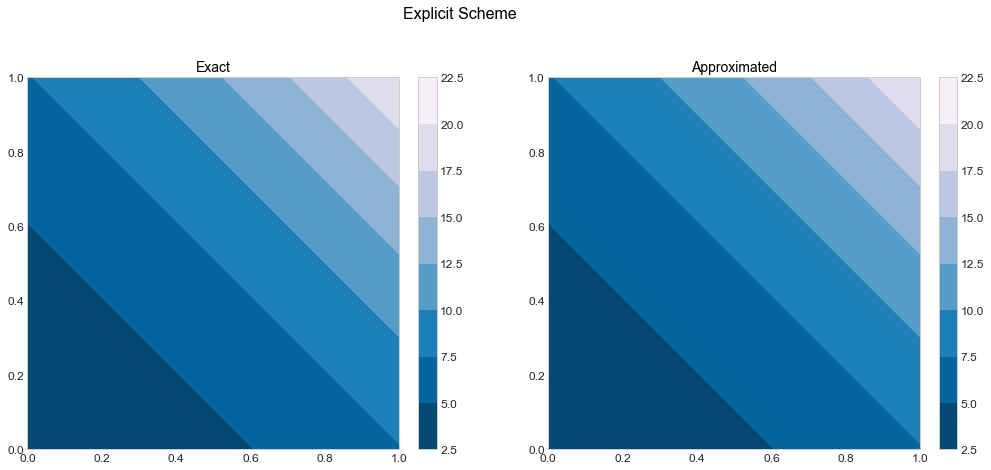

In [4]:
it=3
Norm=np.zeros(it, dtype=float)
N0=10;
Nt0=200;
N=np.asarray([N0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0 for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
CPU_Time=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    if n != (it-1):
        start = timer()
        Norm[n],_,_ =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    else:
        start = timer()
        Norm[n], U_exact, U_Comp =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': N+1, 'Ny': N+1,'Nt': Nt+1, 'Norm': Norm, 'Ratio': Ratio, 'Log2': LOG, 'CPU Time': CPU_Time})
del it, Norm, N0, Nt0, N, Nt, Ratio, LOG, CPU_Time, n, start
display(data.style.format({'Norm': "{:.4e}"}))

Figs(U_exact, U_Comp, Scheme = 'Explicit Scheme', N = data.Nx.values[-1])

,Nx,Ny,Nt,Norm,Ratio,Log2,CPU Time
0,11,11,21,5.6041e-07,0.000000,0.000000,0.113757
1,21,21,41,3.5389e-08,15.835670,3.985106,0.511574
2,41,41,81,2.2321e-09,15.854989,3.986865,2.355361


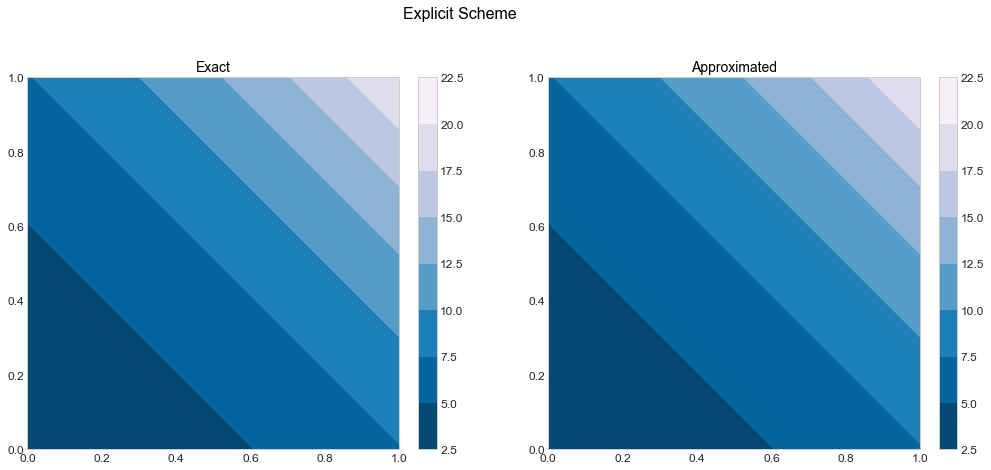

In [5]:
it=3
Norm=np.zeros(it, dtype=float)
N0=10;
Nt0=20;
N=np.asarray([N0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
CPU_Time=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    if n != (it-1):
        start = timer()
        Norm[n],_,_ =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    else:
        start = timer()
        Norm[n], U_exact, U_Comp =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': N+1, 'Ny': N+1,'Nt': Nt+1, 'Norm': Norm, 'Ratio': Ratio, 'Log2': LOG, 'CPU Time': CPU_Time})
del it, Norm, N0, Nt0, N, Nt, Ratio, LOG, CPU_Time, n, start
display(data.style.format({'Norm': "{:.4e}"}))

Figs(U_exact, U_Comp, Scheme = 'Explicit Scheme', N = data.Nx.values[-1])

What stands out from the tables is that the order of the method is 4 (in space and time). Moreover, consider the following experiment to test the stability condition.

In [6]:
it=3
Norm=np.zeros(it, dtype=float)
N0=40;
Nt0=5;
N=np.asarray([N0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
CPU_Time=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    if n != (it-1):
        start = timer()
        Norm[n],_,_ =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    else:
        start = timer()
        Norm[n], U_exact, U_Comp =Example01_4thSolver2D_ED1(N[n],Nt[n])
        CPU_Time[n] = timer() - start
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': N+1, 'Ny': N+1,'Nt': Nt+1, 'Norm': Norm, 'Ratio': Ratio, 'Log2': LOG, 'CPU Time': CPU_Time})
del it, Norm, N0, Nt0, N, Nt, Ratio, LOG, CPU_Time, n, start
display(data.style.format({'Norm': "{:.4e}"}))

,Nx,Ny,Nt,Norm,Ratio,Log2,CPU Time
0,41,41,6,2.2386e-02,0.000000,0.000000,0.126338
1,81,81,11,2.0884e+01,0.001072,-9.865570,0.668539
2,161,161,21,1.0423e+09,0.000000,-25.572850,3.895371
